# Prepare a prediction model for predicting Price.


In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [3]:
#loading data
data = pd.read_csv('ToyotaCorolla.csv' ,encoding = 'latin1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
data2 = pd.concat([data.iloc[:,2:4], data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data3 = data2.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','cc':'cc','Doors':'doors','Gears':'gears','Quarterly_Tax':'quartax','Weight':'weight'},axis=1)
data3

,price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
#check for missing values
data3.isna().sum()

price      0
age        0
km         0
hp         0
cc         0
doors      0
gears      0
quartax    0
weight     0
dtype: int64

In [8]:
#check for duplicated records
data3[data3.duplicated()]

,price,age,km,hp,cc,doors,gears,quartax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
data3.drop_duplicates()

,price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [10]:
data3.describe()

,price,age,km,hp,cc,doors,gears,quartax,weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# Correlation Analysis

In [11]:
data3.corr()

,price,age,km,hp,cc,doors,gears,quartax,weight
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
km,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
hp,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
quartax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


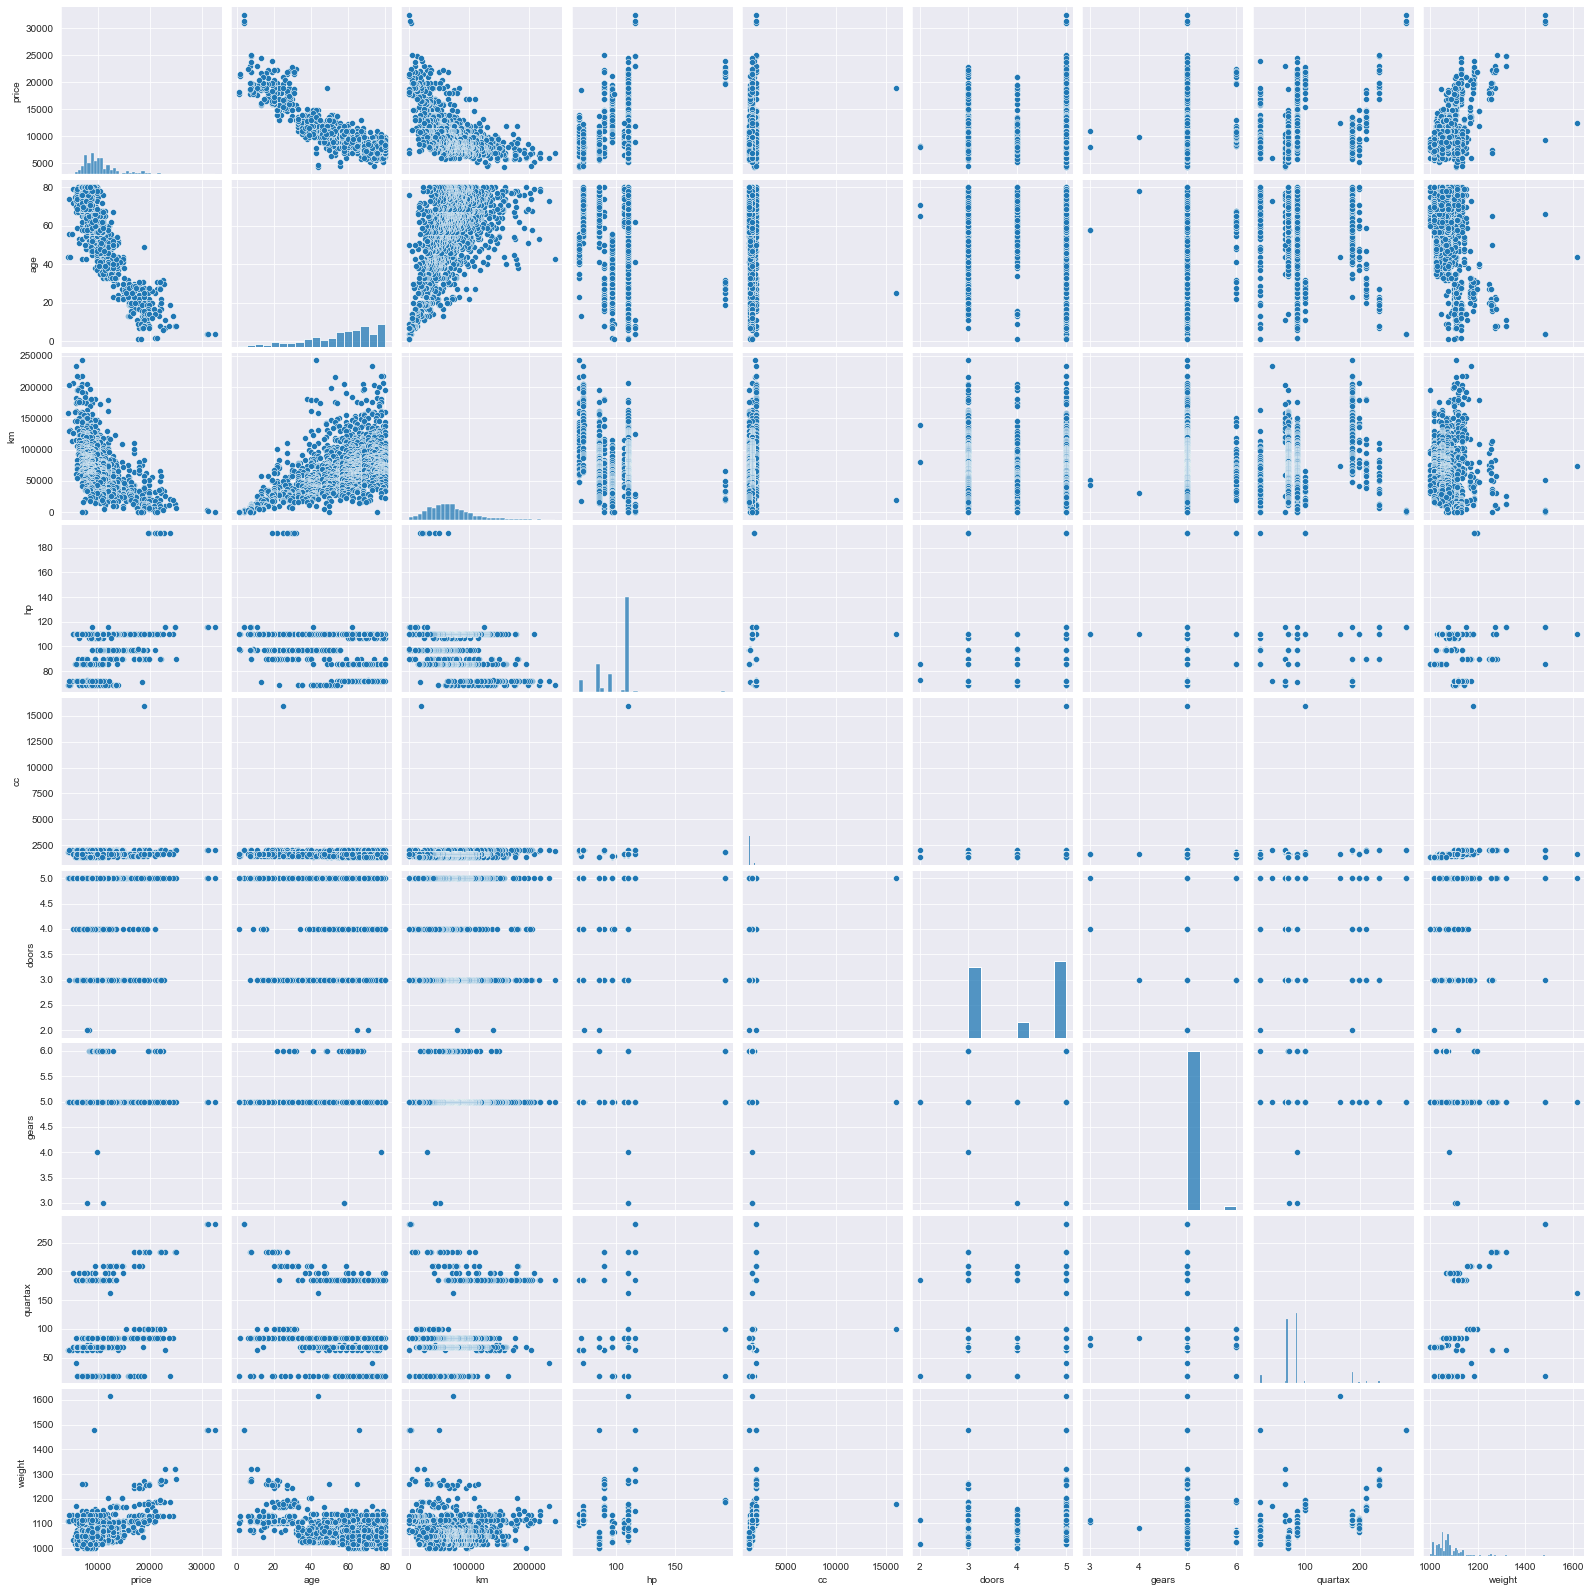

In [12]:
sns.set_style(style='darkgrid')
sns.pairplot(data3)

# Model Building

In [13]:
model = smf.ols('price~age+km+hp+cc+doors+gears+quartax+weight',data=data3).fit()

In [14]:
#Finding Coefficient parameters
model.params

Intercept   -5573.106358
age          -121.658402
km             -0.020817
hp             31.680906
cc             -0.121100
doors          -1.616641
gears         594.319936
quartax         3.949081
weight         16.958632
dtype: float64

In [15]:
#Finding rsquared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428191, 0.8629989775766962)

In [16]:
print(model.tvalues,'/n',model.pvalues)

Intercept    -3.948666
age         -46.511852
km          -16.621622
hp           11.241018
cc           -1.344222
doors        -0.040410
gears         3.016007
quartax       3.014535
weight       15.879803
dtype: float64 /n Intercept     8.241949e-05
age          3.354724e-288
km            7.538439e-57
hp            3.757218e-28
cc            1.790902e-01
doors         9.677716e-01
gears         2.606549e-03
quartax       2.619148e-03
weight        2.048576e-52
dtype: float64


In [17]:
model.tvalues, np.round(model.pvalues,6)

(Intercept    -3.948666
 age         -46.511852
 km          -16.621622
 hp           11.241018
 cc           -1.344222
 doors        -0.040410
 gears         3.016007
 quartax       3.014535
 weight       15.879803
 dtype: float64,
 Intercept    0.000082
 age          0.000000
 km           0.000000
 hp           0.000000
 cc           0.179090
 doors        0.967772
 gears        0.002607
 quartax      0.002619
 weight       0.000000
 dtype: float64)

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 18 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:56:50   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
km            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
hp            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
quartax        3.9491      1.310      3.015      0.003       1.379       6.519
weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Building SLR and MLR models for "Doors" and "CC"

In [19]:
slr_c = smf.ols('price~cc',data = data3).fit()
slr_c.tvalues,slr_c.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64,
 Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [20]:
slr_d = smf.ols('price~doors',data = data3).fit()
slr_d.tvalues, slr_d.pvalues

(Intercept    19.258097
 doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 doors        1.461237e-12
 dtype: float64)

In [21]:
mlr_cd = smf.ols('price~cc+doors',data = data3).fit()
mlr_cd.tvalues,mlr_cd.pvalues

(Intercept    12.620704
 cc            4.340400
 doors         6.816153
 dtype: float64,
 Intercept    1.056885e-34
 cc           1.521992e-05
 doors        1.373469e-11
 dtype: float64)

# Model Validation Techniques

##  Collinearity Check - VIF

In [22]:
#1)Collinearity Problem Check
#Calculate VIF = 1/(1-Rsquare) for all independent variables

In [23]:
rsq_age = smf.ols('age~cc+weight+hp+km+quartax+gears+doors', data=data3).fit().rsquared
vif_age = 1/(1-rsq_age)
vif_age

1.8846198056602876

In [24]:
rsq_cc = smf.ols('cc~age+weight+hp+km+quartax+doors+gears', data=data3).fit().rsquared
vif_cc = 1/(1-rsq_cc)
vif_cc

1.1638939849423804

In [25]:
rsq_wt = smf.ols('weight~cc+age+hp+km+quartax+doors+gears',data=data3).fit().rsquared
vif_wt= 1/(1-rsq_wt)
vif_wt

2.5164198374458677

In [26]:
rsq_hp = smf.ols('hp~weight+cc+age+km+quartax+doors+gears', data=data3).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

1.4194221086310976

In [27]:
rsq_km = smf.ols('km~hp+weight+cc+age+quartax+gears+doors', data=data3).fit().rsquared
vif_km = 1/(1-rsq_km)
vif_km

1.7569047782042877

In [28]:
rsq_qt = smf.ols('quartax~km+hp+weight+age+cc+doors+gears', data=data3).fit().rsquared
vif_qt = 1/(1-rsq_qt)
vif_qt

2.3114308115310376

In [29]:
rsq_d = smf.ols('doors~quartax+weight+age+km+hp+cc+gears', data=data3).fit().rsquared
vif_d = 1/(1-rsq_d)
vif_d

1.1565752070760438

In [30]:
rsq_g = smf.ols('gears~doors+quartax+weight+age+km+hp+cc',data=data3).fit().rsquared
vif_g = 1/(1-rsq_d)
vif_g

1.1565752070760438

In [31]:
df1 = {'feature':['age','cc','weight','hp','km','quartax','doors','gears'],'values':[vif_age,vif_cc,vif_wt,vif_hp,vif_km,vif_qt,vif_d,vif_g]}
df2 = pd.DataFrame(df1)
df2

,feature,values
0,age,1.884620
1,cc,1.163894
2,weight,2.516420
3,hp,1.419422
4,km,1.756905
5,quartax,2.311431
6,doors,1.156575
7,gears,1.156575


In [32]:
#None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

# Residual Analysis

C:\Users\purva\anaconda3.1\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


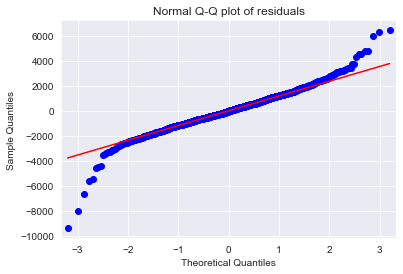

In [37]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [44]:
list(np.where(model.resid <-6000))

[array([221, 601, 960], dtype=int64)]

In [40]:
list(np.where(model.resid>6000))

[array([147, 523], dtype=int64)]

In [45]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma


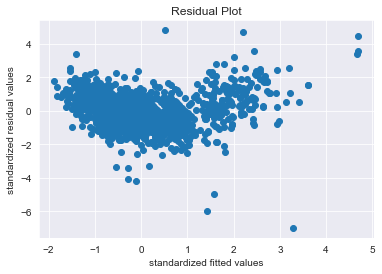

In [46]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

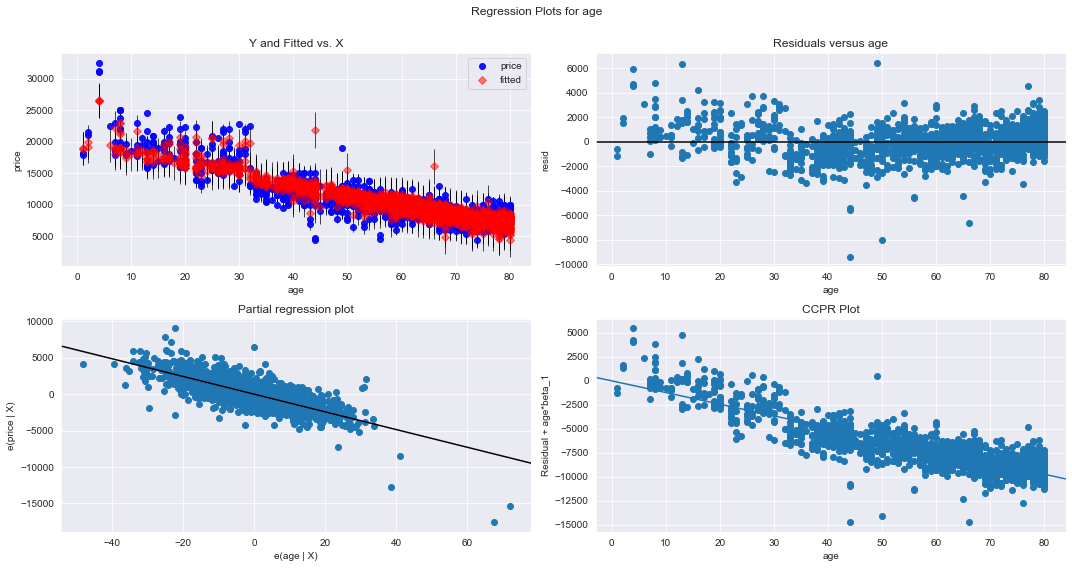

In [48]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

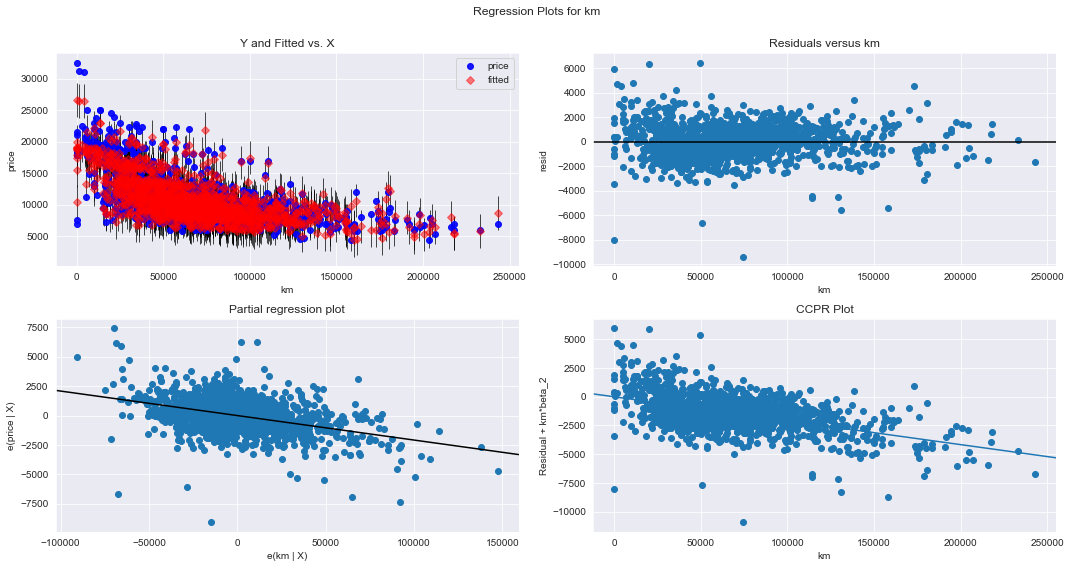

In [50]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show()

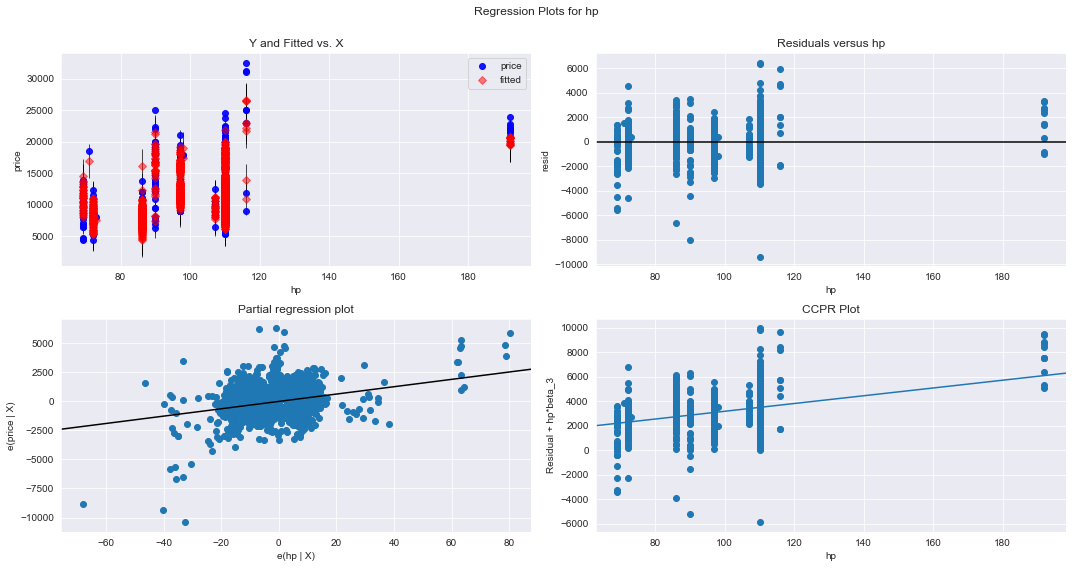

In [51]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

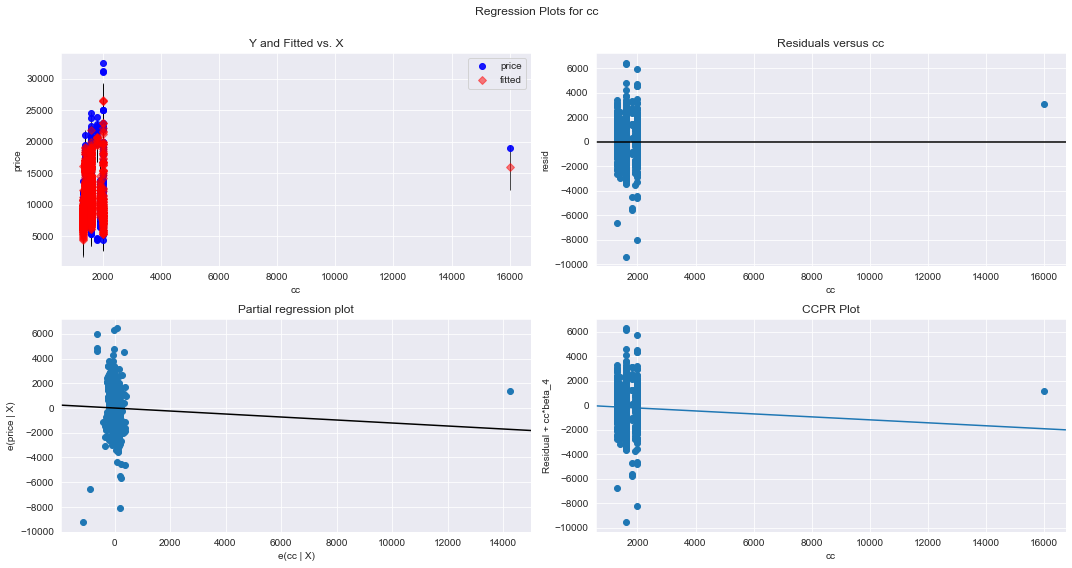

In [52]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

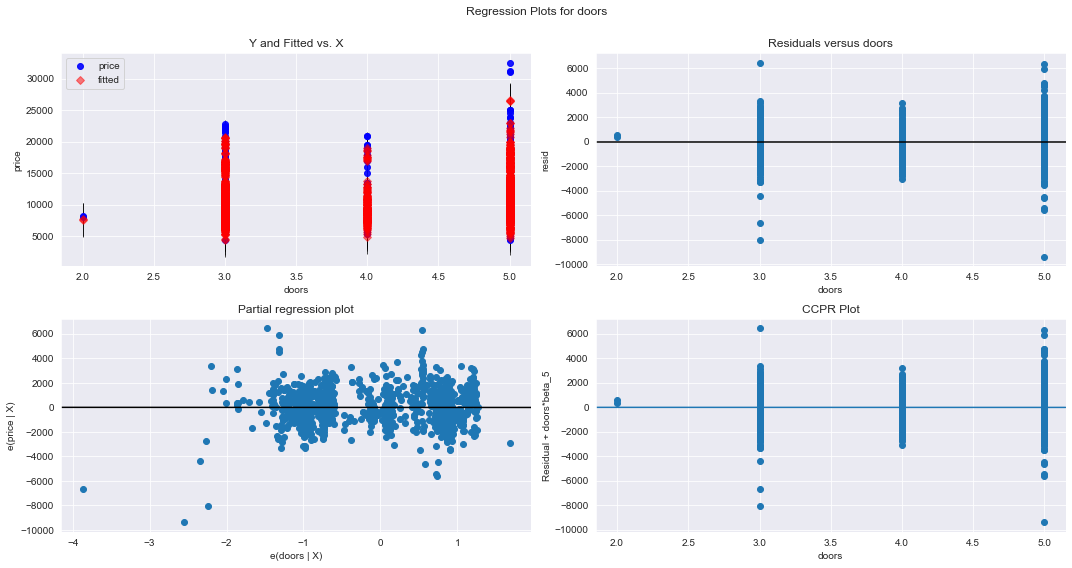

In [53]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

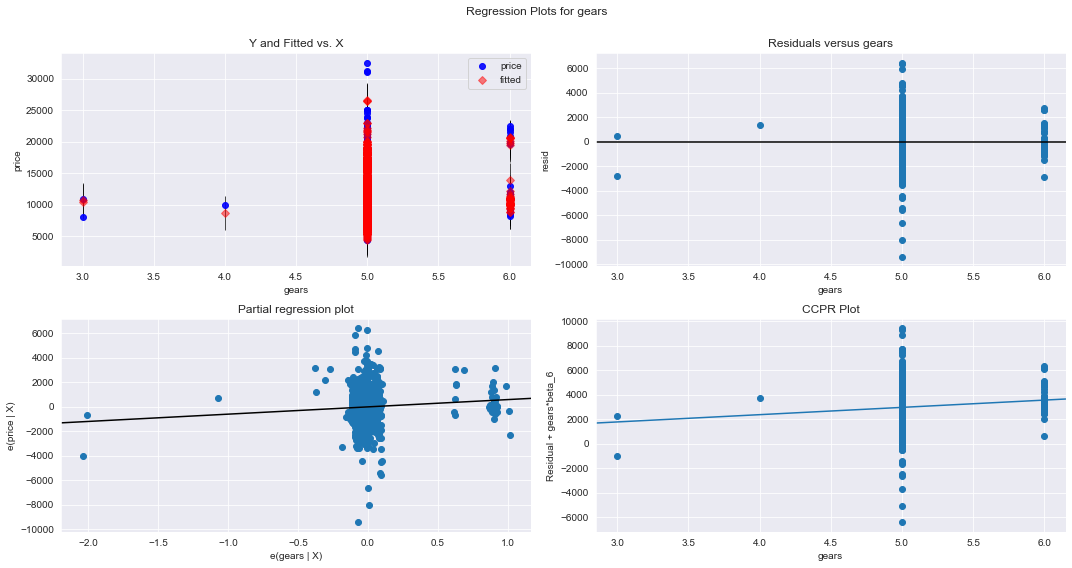

In [54]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

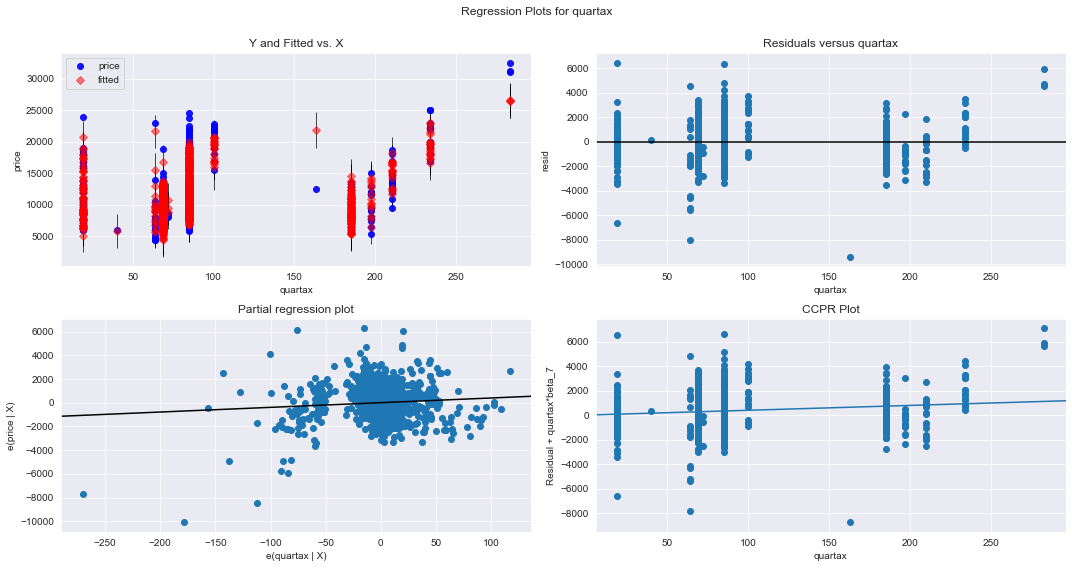

In [56]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'quartax',fig=fig)
plt.show()

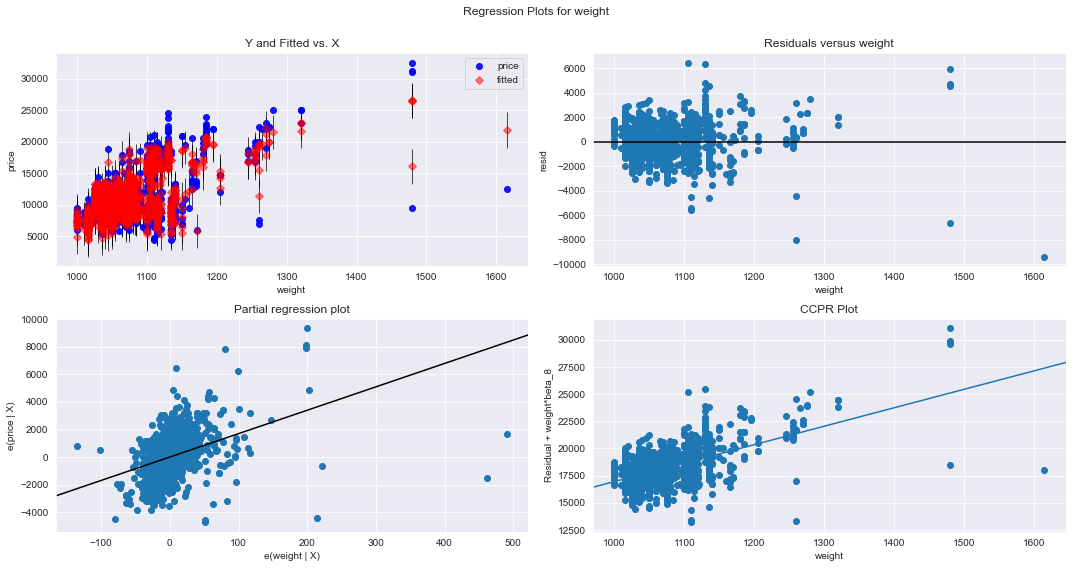

In [57]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'weight',fig=fig)
plt.show()

# Model Deletion Diagnostics

In [38]:
#Cook's Distance: If Cook's distance > 1, then it's an outlier
#Get influencers using cook's distance
(c,_)= model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

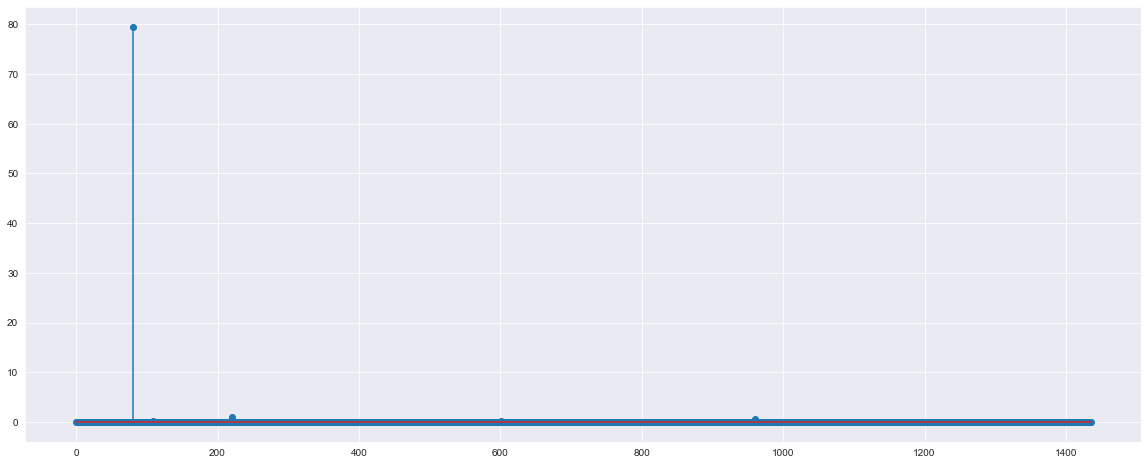

In [39]:
#Plot the influencers using the stem plot
fig = plt.figure(figsize =(20,8))
plt.stem(np.arange(len(data3)),np.round(c,5))
plt.xlabel = ('Row Index')
plt.ylabel = ('Cooks Distance')
plt.show()            

In [40]:
np.argmax(c), np.max(c)

(80, 79.5201062414182)

In [41]:
data3[data3.index.isin([80])]

,price,age,km,hp,cc,doors,gears,quartax,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [42]:
#Creating a copy of data so that original data is not affected
data4 = data3.copy()
data4

,price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
# Discarding the influencers and reassign the row number (reset_index(drop=True))
data5=data4.drop(data3.index[[80]],axis=0).reset_index(drop=True)
data5

,price,age,km,hp,cc,doors,gears,quartax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [57]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
         model=smf.ols('price~age+km+hp+cc+quartax+weight+doors+gears',data=data5).fit()
         (c,_)=model.get_influence().cooks_distance
         c
         np.argmax(c) , np.max(c)
         data5=data5.drop(data5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
         data5
    else:
         final_model=smf.ols('price~age+km+hp+cc+quartax+weight+doors+gears',data=data5).fit()
         final_model.rsquared , final_model.aic
         print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8914204825569462
Thus model accuracy is improved to 0.8921467826162199
Thus model accuracy is improved to 0.8934037497368835
Thus model accuracy is improved to 0.8944954473640403
Thus model accuracy is improved to 0.8958333530393431
Thus model accuracy is improved to 0.8966334481080779
Thus model accuracy is improved to 0.8941835374074523
Thus model accuracy is improved to 0.8951069956497651
Thus model accuracy is improved to 0.8965514940097825
Thus model accuracy is improved to 0.897153136889326
Thus model accuracy is improved to 0.8979680072945878
Thus model accuracy is improved to 0.8975421185310549
Thus model accuracy is improved to 0.8970095523065387
Thus model accuracy is improved to 0.8965434597967323
Thus model accuracy is improved to 0.8961255789744986
Thus model accuracy is improved to 0.8972646982898881
Thus model accuracy is improved to 0.896772534985454
Thus model accuracy is improved to 0.8971051472272297
Thus model accuracy is improve

In [58]:
final_model.rsquared 

0.9003762532318559

In [65]:
# say New data for prediction is
new_data=pd.DataFrame({'age':12,"km":40000,"hp":86,"cc":2000,"doors":4,"gears":5,"quartax":19,"weight":1165},index=[0])
new_data

,age,km,hp,cc,doors,gears,quartax,weight
0,12,40000,86,2000,4,5,19,1165


In [66]:
#Manual Prediction of Price
final_model.predict(new_data)

0    19093.13563
dtype: float64

In [67]:
#Prediction of Price with 90.03% accurcy
pred_y=final_model.predict(data5)
pred_y


0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64